Libraries

In [47]:
import tensorflow as tf
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [8]:
dataset=tf.keras.datasets.fashion_mnist
(train,train_labels),(test,test_labels)=dataset.load_data()

In [9]:
train.shape

(60000, 28, 28)

In [10]:
test.shape

(10000, 28, 28)

Image Preprocessing

In [12]:
train=train.reshape(60000,28,28,1)
train=train/255

In [14]:
test=test.reshape(10000,28,28,1)
test=test/255

CNN

In [18]:
cnn=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="same",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [19]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [20]:
model=cnn.fit(train,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 134s 71ms/step - loss: 0.4358 - accuracy: 0.8425
Epoch 2/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.2832 - accuracy: 0.8957
Epoch 3/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.2402 - accuracy: 0.9115
Epoch 4/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.2101 - accuracy: 0.9212
Epoch 5/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.1834 - accuracy: 0.9311
Epoch 6/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.1645 - accuracy: 0.9382
Epoch 7/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.1472 - accuracy: 0.9445
Epoch 8/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.1311 - accuracy: 0.9505
Epoch 9/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.1148 - accuracy: 0.9565
Epoch 10/10
1875/1875 [==============================] 

In [45]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Text(0.5, 1.0, 'Training Accuracy over Epochs')

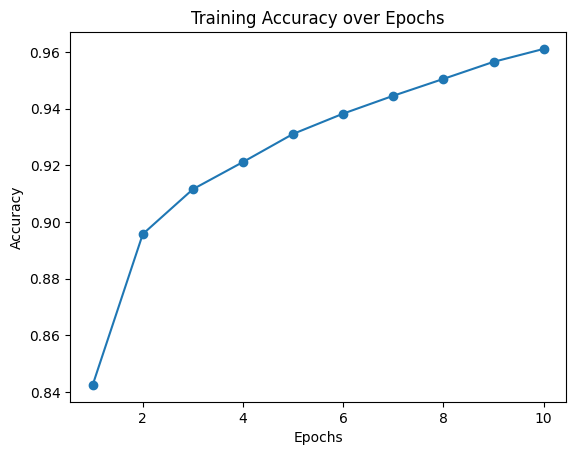

In [30]:
plt.plot(range(1, 11), model.history['accuracy'], marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')

In [31]:
testing_accuracy = []
for epoch in range(10):
    testing_results = cnn.evaluate(test, test_labels, verbose=0)
    testing_accuracy.append(testing_results[1])

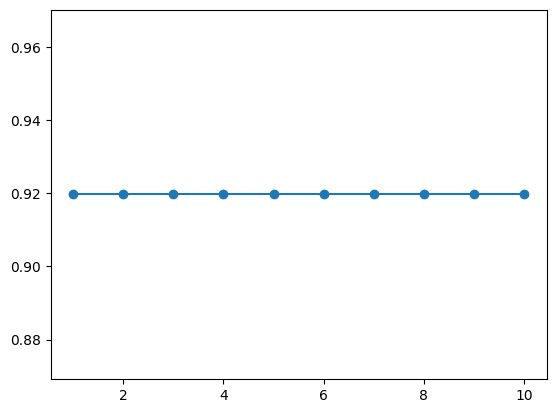

In [32]:
plt.plot(range(1, 11), testing_accuracy, marker='o', label='Testing Accuracy')

In [23]:
uploaded_file = files.upload()
uploaded_image_path = list(uploaded_file.keys())[0]

Saving pngwing.com (3).png to pngwing.com (3).png


1/1 [==============================] - 0s 25ms/step


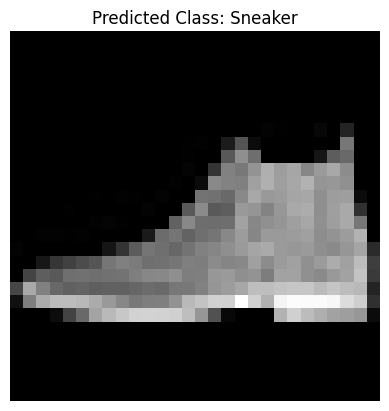

In [46]:
test_image = test[0]
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0

predicted_label = cnn.predict(test_image)
predicted_label = np.argmax(predicted_label)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
predicted_class = class_names[predicted_label]

plt.imshow(test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()
